In [1]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


In [2]:
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import *
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#!pip install pandas --upgrade
import math
import sys
%matplotlib inline
sns.set()

In [3]:
sys.path.append('../method/')
import dataset as ds
import preprocessing as pp
import machine_algorithm as ma

In [18]:
d_train = ds.load_data("/Users/e185716/研究/R/ei_make/event_train.csv")
d_test = ds.load_data("/Users/e185716/研究/R/ei_make/event_test.csv")

In [19]:
d_train['date'] = pd.to_datetime(d_train['date'])
d_test['date'] = pd.to_datetime(d_test['date'])
date_list = d_test['date']

# 'date_column'列をインデックスとして設定
d_train.set_index('date', inplace=True)
d_test.set_index('date', inplace=True)

# ARIMAモデル

In [22]:
print(sm.tsa.arma_order_select_ic(d_train['CustNum'], ic='aic', trend='n'))

/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/e1

{'aic':               0            1            2
0  10622.997752  9950.243865  9623.178684
1   9206.014071  9206.435672  9100.068360
2   9207.299994  9206.385946  9070.531042
3   9163.615206  9074.280231  9076.343247
4   9155.374700  9071.350547  9085.482422, 'aic_min_order': (2, 2)}


/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
import statsmodels.api as sm

arima_model = ARIMA(d_train["CustNum"], order=(2, 0, 2))

/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [38]:
arima_result = arima_model.fit()
#res = arima_model.fit(disp=0)
arima_forecast = arima_result.forecast(steps=len(d_test["CustNum"]))

In [57]:
forecasted_data = arima_result.predict(start=date_list[0], end=date_list[len(date_list)-1])


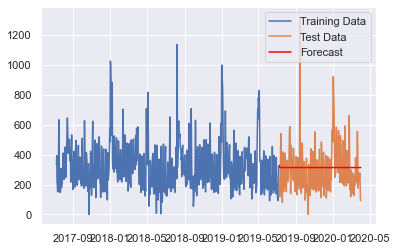

In [58]:
plt.plot(d_train["CustNum"], label='Training Data')
plt.plot(d_test["CustNum"], label='Test Data')
plt.plot(d_test["CustNum"].index, forecasted_data, label='Forecast', color='red')
plt.legend()
plt.show()

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
rmse = np.sqrt(mean_squared_error(d_test["CustNum"], arima_forecast))
# 決定係数の計算
r2 = r2_score(d_test["CustNum"], arima_forecast)
print("RMSE : " + str(rmse))
print("決定係数 : " + str(r2))


RMSE : 154.08056323723847
決定係数 : -0.014885283113111214


In [36]:
import os


In [37]:
os.makedirs("/Users/e185716/研究/R/forecast_result", exist_ok=True)

In [40]:
output_file = os.path.join("/Users/e185716/研究/R/forecast_result", "arima_result.csv")
arima_forecast.to_csv(output_file)

In [16]:
arima_forecast

2019-07-08    314.834504
2019-07-09    294.988988
2019-07-10    291.786393
2019-07-11    293.013254
2019-07-12    295.224581
                 ...    
2020-03-28    313.406472
2020-03-29    313.406472
2020-03-30    313.406472
2020-03-31    313.406472
2020-04-01    313.406472
Freq: D, Name: predicted_mean, Length: 269, dtype: float64

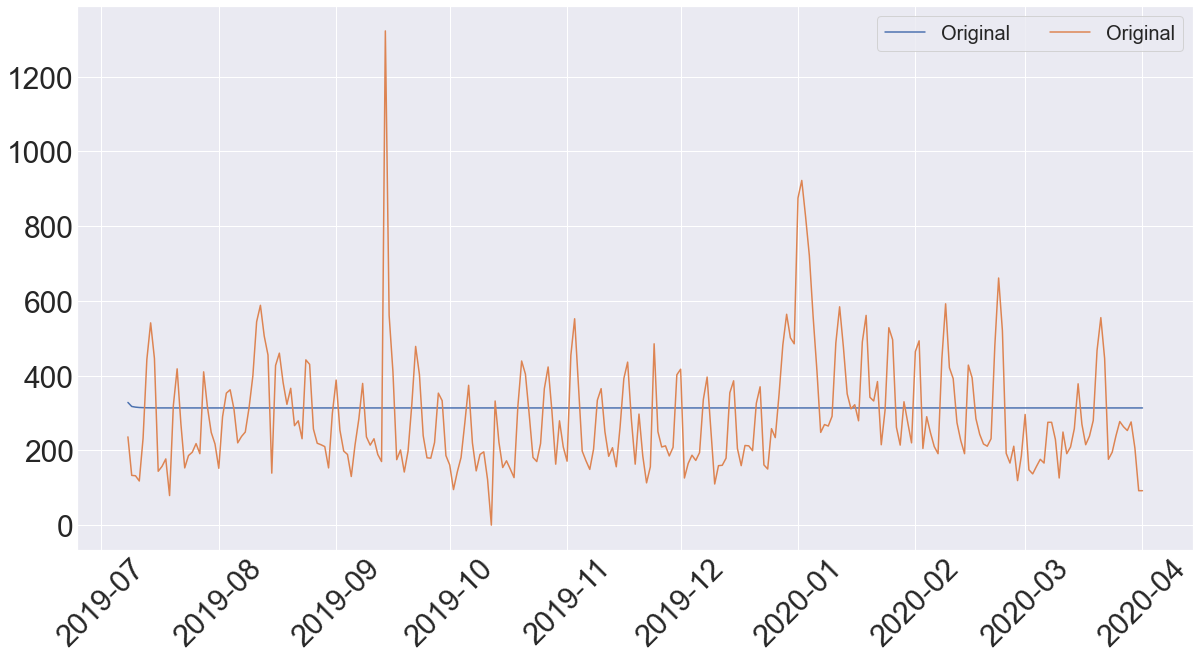

In [55]:
import datetime
import os


fig, ax = plt.subplots(figsize=(20, 10))

# plt.plot(arima_forecast,label='Original')
plt.plot(forecasted_data,label='Original')

plt.plot(d_test["CustNum"],label='Original')
# # sxmin='2018-07-08'
# # sxmax='2020-03-12'

# # xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# # xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# # plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/FV_result/"
os.makedirs(save_dir_name, exist_ok=True)
save_file_name = save_dir_name + "ei_10" + ".png"
fig.savefig(save_file_name,bbox_inches="tight")

# SARIMAモデル

In [6]:
d_test

,salesTotal,CustNum,kankou,tabelog,day1_sales,day1_kankou,day1_tabelog,event_impact,GW,お盆,イベント,クリスマス,三連休,交通規制,元日,台風,大晦日,祝日,雨
date,,,,,,,,,,,,,,,,,,,
2019-07-08,553520.0,236.0,1141.0,670.0,759570.0,876.0,570.0,0,0,0,0,0,0,0,0,0,0,0,0
2019-07-09,356740.0,133.0,876.0,429.0,553520.0,984.0,670.0,0,0,0,0,0,0,0,0,0,0,0,0
2019-07-10,372840.0,132.0,984.0,414.0,356740.0,1216.0,429.0,0,0,0,0,0,0,0,0,0,0,0,0
2019-07-11,283870.0,118.0,1216.0,376.0,372840.0,2140.0,414.0,-5,0,0,0,0,0,0,0,0,0,0,1
2019-07-12,563930.0,232.0,2140.0,463.0,283870.0,9916.0,376.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-28,560978.0,253.0,6683.0,318.0,602772.0,4156.0,343.0,-5,0,0,0,0,0,0,0,0,0,0,1
2020-03-29,652850.0,276.0,4156.0,214.0,560978.0,3157.0,318.0,-5,0,0,0,0,0,0,0,0,0,0,1
2020-03-30,459392.0,206.0,3157.0,230.0,652850.0,3158.0,214.0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# サンプルの時系列データを読み込むなどして準備する
# ここでは適当なデータを用意していないため、データの読み込みや準備のコードは省略しています

# SARIMAモデルの構築
# order=(p, d, q)とseasonal_order=(P, D, Q, s)でパラメータを指定します
# p, d, q はARIMAモデルのパラメータであり、P, D, Q, s は季節性のパラメータです
# 例えば、order=(1, 1, 1)、seasonal_order=(1, 1, 1, 12)は、1次の自己回帰、1次の差分、1次の移動平均モデルを意味し、
# 同時に12ヶ月周期の季節性を考慮しています
sarima_model = SARIMAX(d_train["CustNum"], order=(2, 0, 2), seasonal_order=(1, 1, 1, 7))

# データにモデルを適合させる
fitted_model = sarima_model.fit()

# 未来のデータを予測する
# startパラメータとendパラメータを使って、予測の開始と終了のインデックスを指定します
# 例えば、start='2024-01-01'、end='2024-12-31'とすると、2024年の1月1日から12月31日までのデータが予測されます
forecasted_data = fitted_model.predict(start='2019-07-08', end='2020-04-01')

# 予測されたデータを表示するなど、必要な処理を行う
print(forecasted_data)

/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38746D+00    |proj g|=  8.76529D-01

At iterate    5    f=  6.04412D+00    |proj g|=  3.62765D-02

At iterate   10    f=  6.01811D+00    |proj g|=  9.63728D-03

At iterate   15    f=  6.01385D+00    |proj g|=  8.51244D-03

At iterate   20    f=  5.93209D+00    |proj g|=  4.95489D-02

At iterate   25    f=  5.92478D+00    |proj g|=  7.09731D-03

At iterate   30    f=  5.92360D+00    |proj g|=  1.00559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

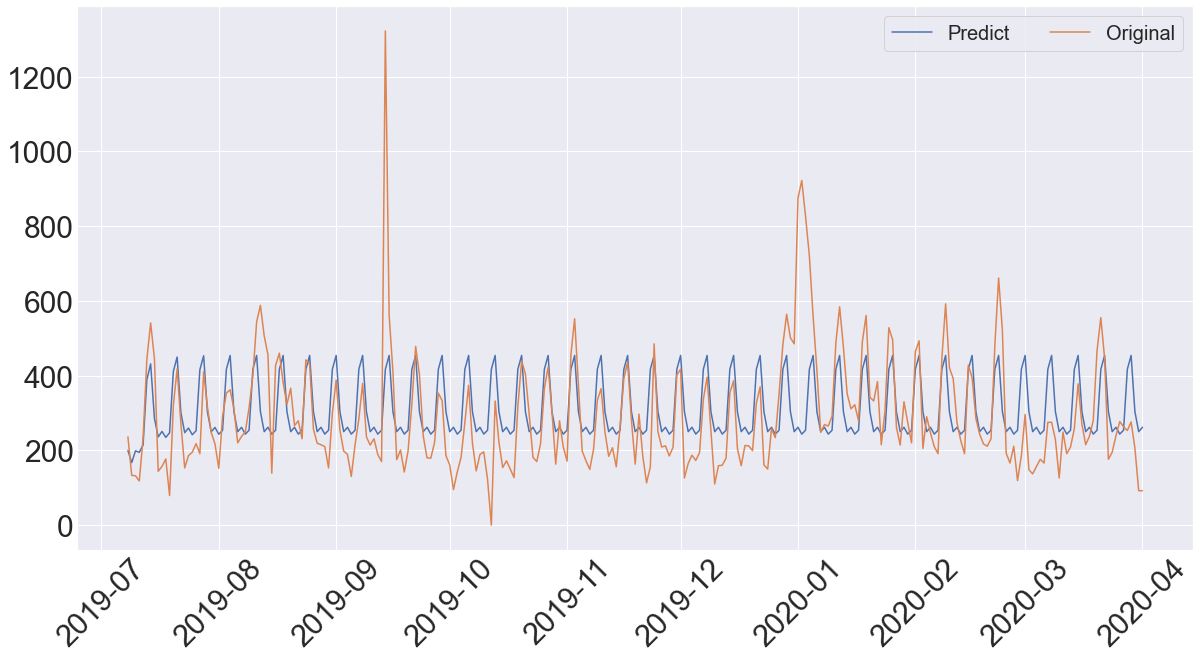

In [14]:
import datetime
import os


fig, ax = plt.subplots(figsize=(20, 10))

# plt.plot(arima_forecast,label='Original')
plt.plot(forecasted_data,label='Predict')

plt.plot(d_test["CustNum"],label='Original')
# # sxmin='2018-07-08'
# # sxmax='2020-03-12'

# # xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# # xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# # plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/"
os.makedirs(save_dir_name, exist_ok=True)
save_file_name = save_dir_name + "sarima" + ".png"
fig.savefig(save_file_name,bbox_inches="tight")

In [13]:
rmse = np.sqrt(mean_squared_error(d_test["CustNum"], forecasted_data))
# 決定係数の計算
r2 = r2_score(d_test["CustNum"], forecasted_data)
print("RMSE : " + str(rmse))
print("決定係数 : " + str(r2))


RMSE : 129.27834750667165
決定係数 : 0.2855483815032023


In [20]:
d_test[d_test['祝日'] == 1].index

DatetimeIndex(['2020-02-11'], dtype='datetime64[ns]', name='date', freq=None)

# n期先予測

In [60]:
d_train = ds.load_data("/Users/e185716/研究/R/ei_make/event_train.csv")
d_test = ds.load_data("/Users/e185716/研究/R/ei_make/event_test.csv")

d_train['date'] = pd.to_datetime(d_train['date'])
d_test['date'] = pd.to_datetime(d_test['date'])


# 'date_column'列をインデックスとして設定
d_train.set_index('date', inplace=True)
d_test.set_index('date', inplace=True)

In [51]:
print(sm.tsa.arma_order_select_ic(d_train['CustNum'], ic='aic', trend='n'))

/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/e1

{'aic':               0            1            2
0  10622.997752  9950.243865  9623.178684
1   9206.014071  9206.435672  9100.068360
2   9207.299994  9206.385946  9070.531042
3   9163.615206  9074.280231  9076.343247
4   9155.374700  9071.350547  9085.482422, 'aic_min_order': (2, 2)}


/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
import statsmodels.api as sm
arima_7step = []

for  i in range(7):
    arima_model = ARIMA(d_train["CustNum"], order=(2, 0, 2))
    arima_result = arima_model.fit()
    arima_forecast = arima_result.forecast(steps=len(d_test["CustNum"]))
    arima_7step.append(arima_forecast)
    d_train = d_train.shift(1)
    

/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/e185716/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency i

In [67]:
arima_7step[1]

2019-07-08    255.188989
2019-07-09    267.563784
2019-07-10    274.886590
2019-07-11    280.278574
2019-07-12    284.691157
                 ...    
2020-03-28    313.352754
2020-03-29    313.352754
2020-03-30    313.352754
2020-03-31    313.352754
2020-04-01    313.352754
Freq: D, Name: predicted_mean, Length: 269, dtype: float64

In [72]:
save_dir_name = "/Users/e185716/研究/R/forecast_result/arima_7step"
os.makedirs(save_dir_name, exist_ok=True)

for i,j in enumerate(arima_7step):
    save_file_name = "arima_result_step" + str(i+1) + ".csv"
    output_file = os.path.join(save_dir_name, save_file_name)
    j.to_csv(output_file)


NameError: name 'all_data' is not defined

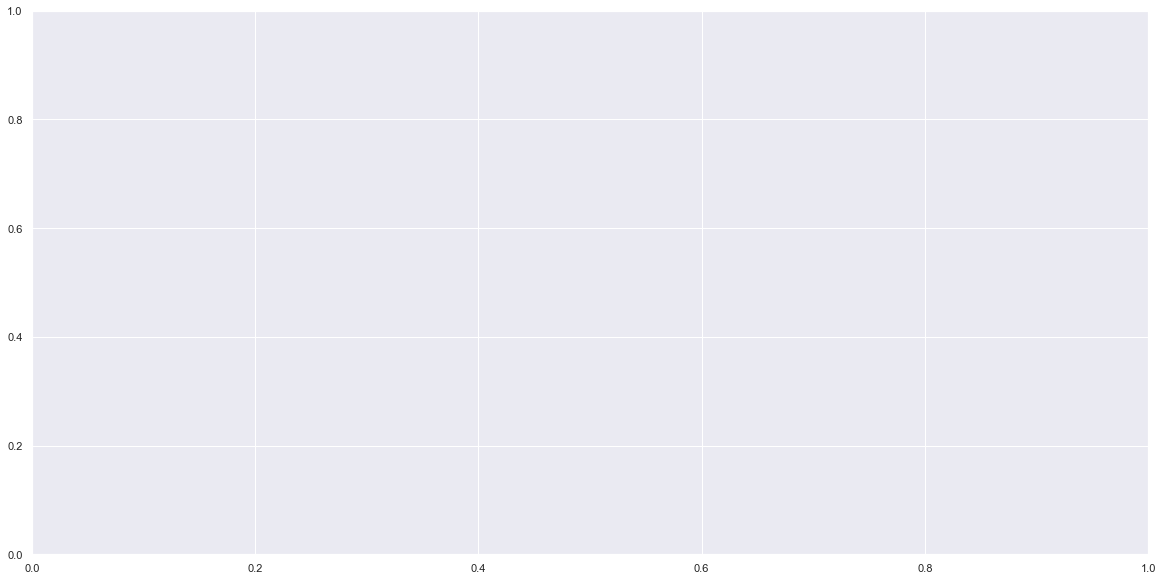

In [66]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data, label='Original')
plt.plot(ei_result["CustNum"],label='Event Impact')
plt.plot(ei_trend_result["CustNum"],label='Event Impact + Trend')
plt.plot(trend_result["CustNum"],label='Trend')
plt.plot(none_result["CustNum"],label='none')
# sxmin='2018-07-08'
# sxmax='2020-03-12'

# xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

# Crossvalidation

In [48]:
all_data = ds.load_data("/Users/e185716/研究/R/ei_make/data_before_split.csv")

In [49]:
all_data['date'] = pd.to_datetime(all_data['date'])


# 'date_column'列をインデックスとして設定
all_data.set_index('date', inplace=True)


In [50]:
all_data = all_data.loc[:,["CustNum"]]

In [51]:
len(all_data)

999

In [52]:
cross_train_first = 0
cross_train_last = 730
cross_test_first = 730
cross_test_last = cross_test_first + 30

loop_num = math.ceil((len(all_data) - cross_train_last)/30)

split_train = []
split_test = []

for i in range(loop_num):
    d_train = all_data[cross_train_first:cross_train_last]
    if i == loop_num:
        d_test = all_data[cross_test_first:len(all_data)]
    else:
        d_test = all_data[cross_test_first:cross_test_last]
    
    split_train.append(d_train)
    split_test.append(d_test)
    
    cross_train_first = cross_train_first + 30
    cross_train_last = cross_train_last + 30
    cross_test_first = cross_test_first + 30
    cross_test_last = cross_test_last + 30

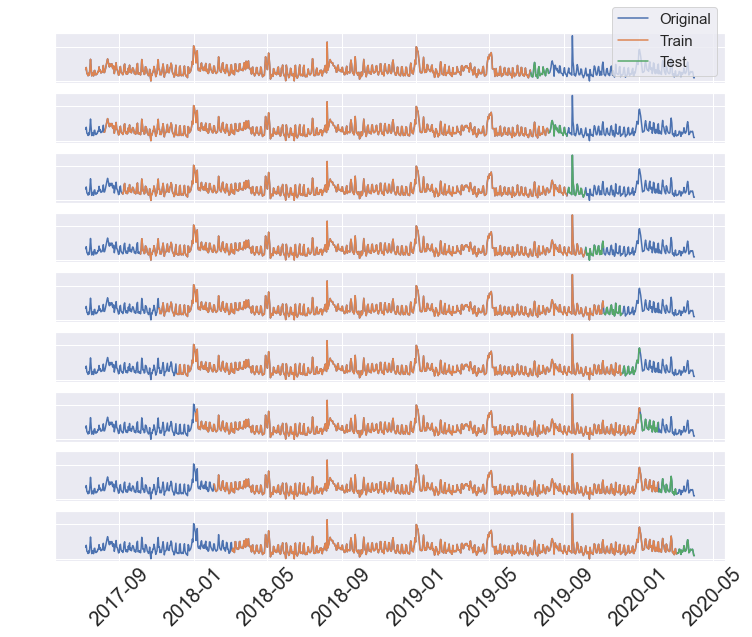

In [78]:
#fig, ax = plt.subplots(11 , 1, figsize=(12, 12))

fig = plt.figure(figsize=(12, 13))
count = 1
first = True
for i, j in zip(split_train, split_test):
  if first == True:
    plt.subplot(12,1,1)
    plt.plot(all_data, label='Original')
    plt.plot(i, label='Train')
    plt.plot(j, label='Test')
    plt.legend(fontsize=15)
    #ax.axes.xaxis.set_visible(False)
    #ax.axes.yaxis.set_visible(False)
    plt.xticks(color="None")
    plt.yticks(color="None")
    #plt.tick_params(length=0)
    count += 1
    first = False

  elif count == loop_num:
    plt.subplot(12,1,count)
    plt.plot(all_data)
    plt.plot(i)
    plt.plot(j)
    #ax.axes.xaxis.set_visible(False)
    #ax.axes.yaxis.set_visible(False)
    #plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.tick_params(labelsize=20)
    plt.xticks(rotation=45)

  else:
    plt.subplot(12,1,count)
    plt.plot(all_data)
    plt.plot(i)
    plt.plot(j)
    #ax.axes.xaxis.set_visible(False)
    #ax.axes.yaxis.set_visible(False)
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    count += 1

fig.savefig("/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/crossvalidation.png",bbox_inches="tight")